### Nama : Muhammad Ilham Febriana
### NIM : 2602656022
### Jawaban nomor 4 Final Exam ML BINUS

In [ ]:
import chardet

# membaca file CSV dan mendeteksi encoding-nya
with open("sales_data.csv", "rb") as f:
    result = chardet.detect(f.read(10000))

print(result)  

encoding = result['encoding']
print(f"Detected encoding: {encoding}")


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Detected encoding: ascii


# EDA (Explanory Data Analysis)
Dataset yang digunakan dalam penelitian ini dari record penjualan di toko retail. Fitur-fitur yang ada dalam dataset berisi tentang produk, penjualan, dan stock barang yang ada dalam suatu periode waktu tertentu. 

Dataset "sales data" sangat bagus dan seimbang karena tidak adanya missing value dan hubungan antar fitur yang seimbang, bisa dilihat pada grafik heatmap sehingga membuat permodelan memiliki score perfomrmance yang sangat tinggi.

data teratas fitur terpenting:
Ukuran dataset: (9120, 16)
             Date Store ID Product ID     Category Region  Inventory Level  \
53731  2023-06-22     S002      P0012  Electronics  South              339   
61112  2023-09-04     S001      P0013         Toys  North               67   
72074  2023-12-22     S004      P0015    Furniture   West              263   
56928  2023-07-24     S002      P0009    Groceries  South              260   
20979  2022-07-29     S004      P0020    Furniture   West              302   
59697  2023-08-20     S005      P0018     Clothing  North               90   
51092  2023-05-26     S005      P0013    Groceries  North              179   
70258  2023-12-04     S003      P0019    Groceries   East              215   
51086  2023-05-26     S005      P0007    Groceries  North              384   
1768   2022-01-18     S004      P0009     Clothing   West              445   

       Units Sold  Units Ordered   Price  Discount Weather Condition  \
53731      

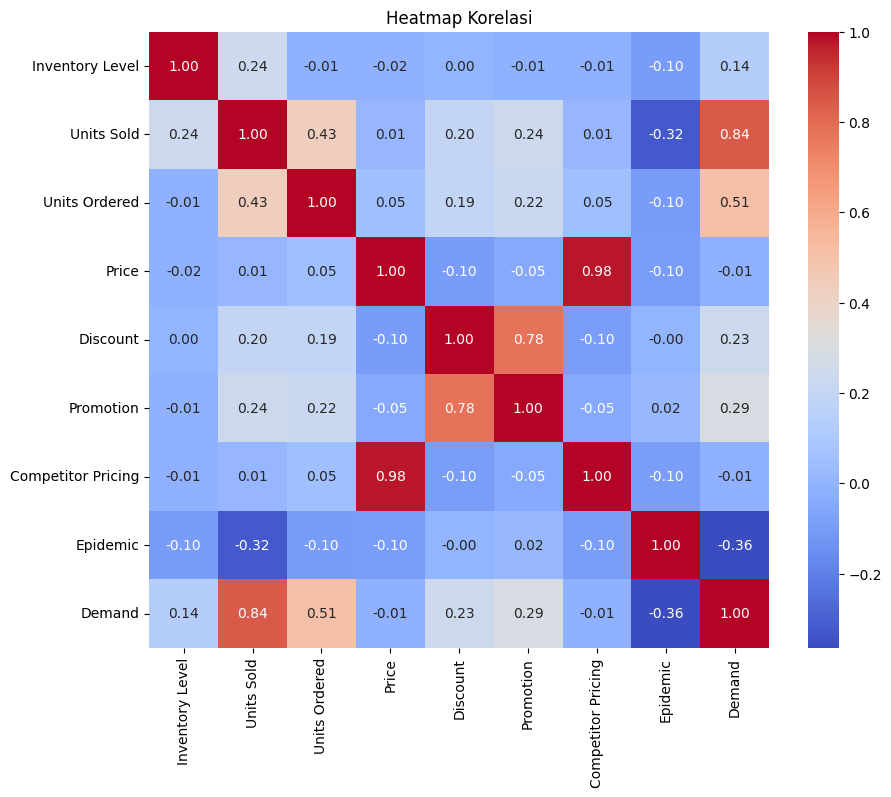

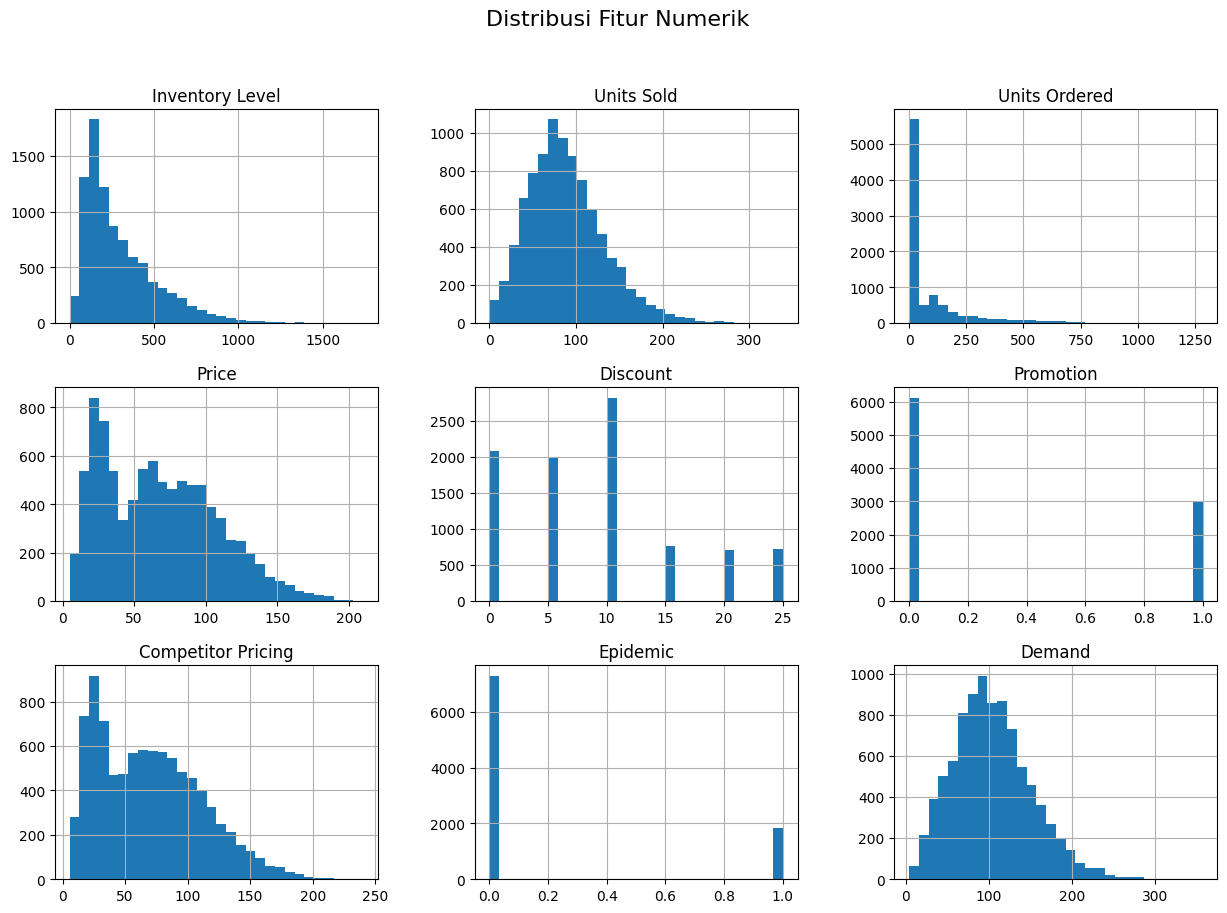

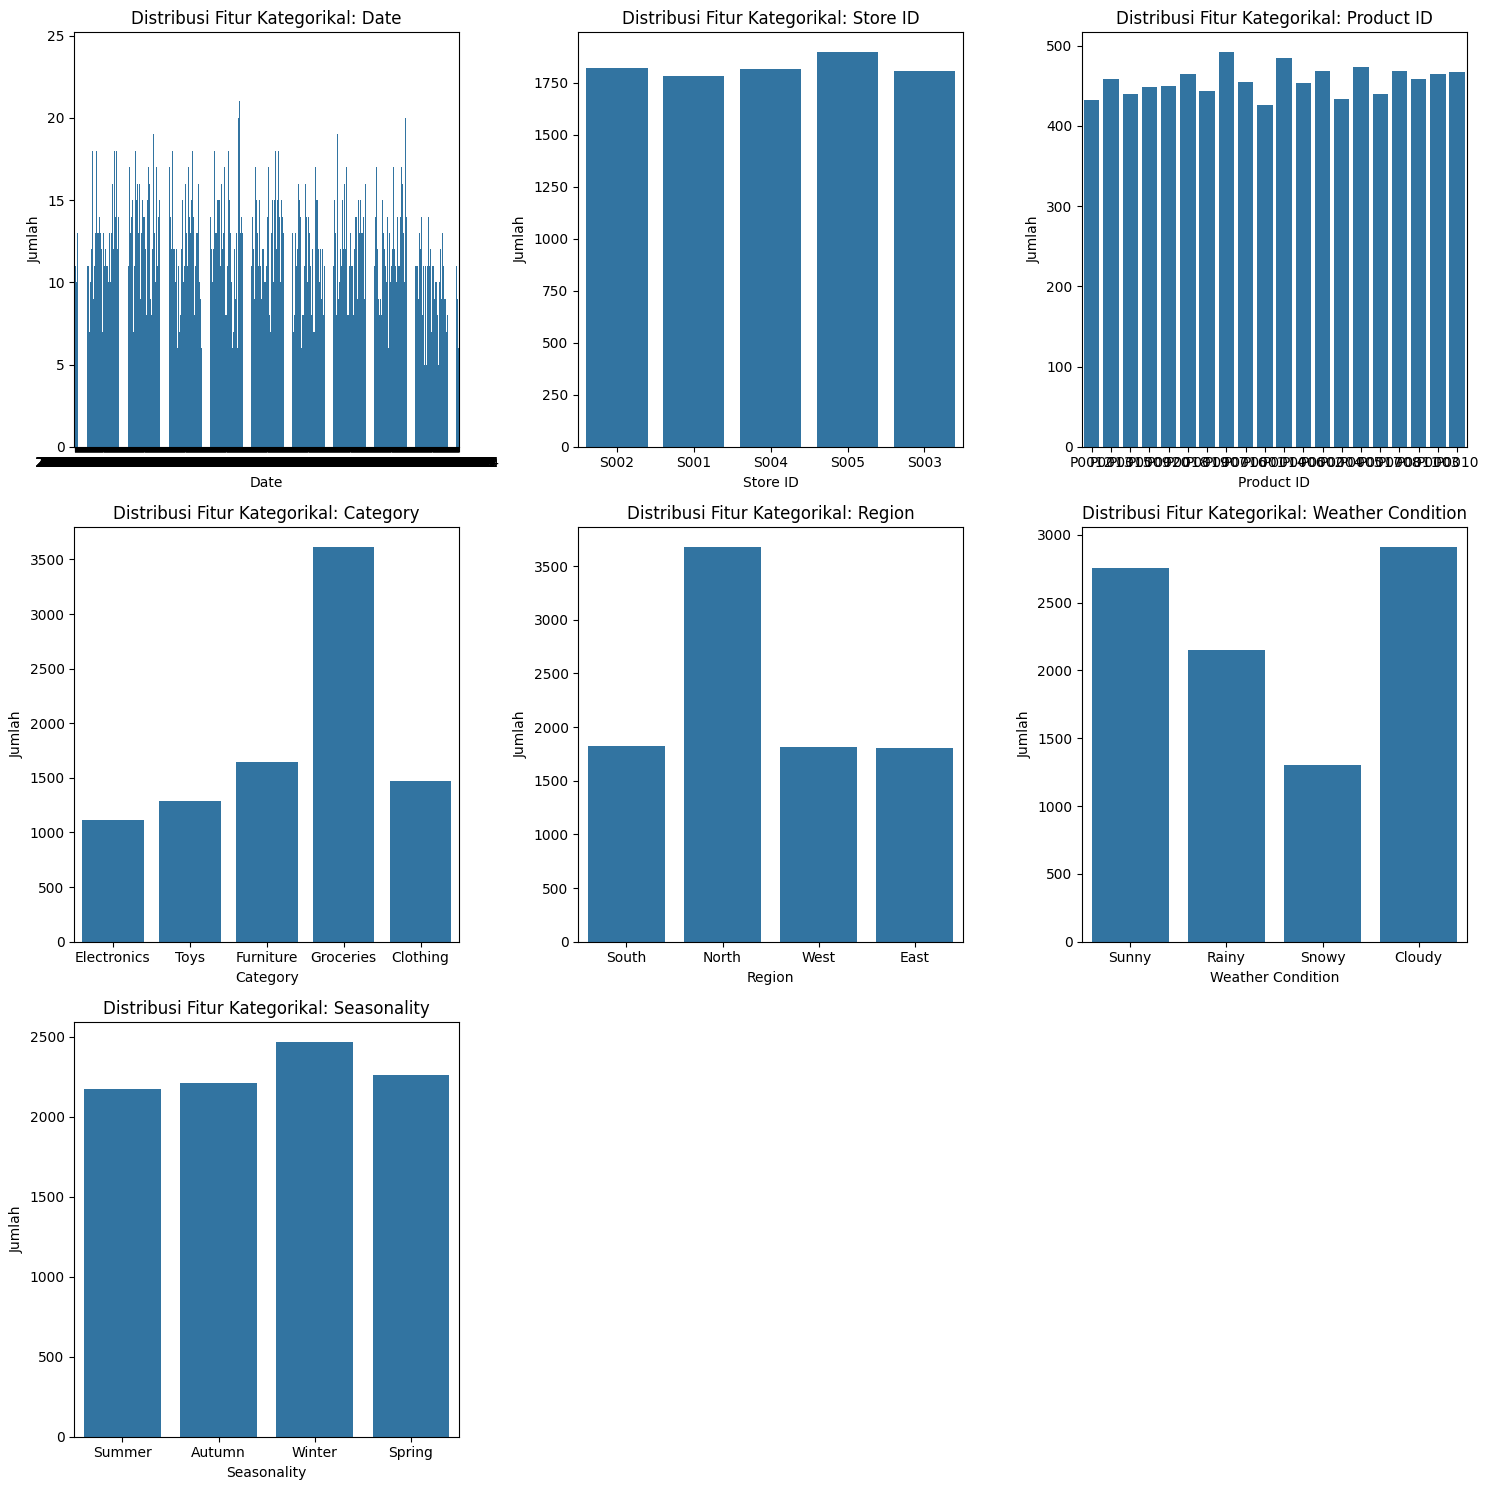

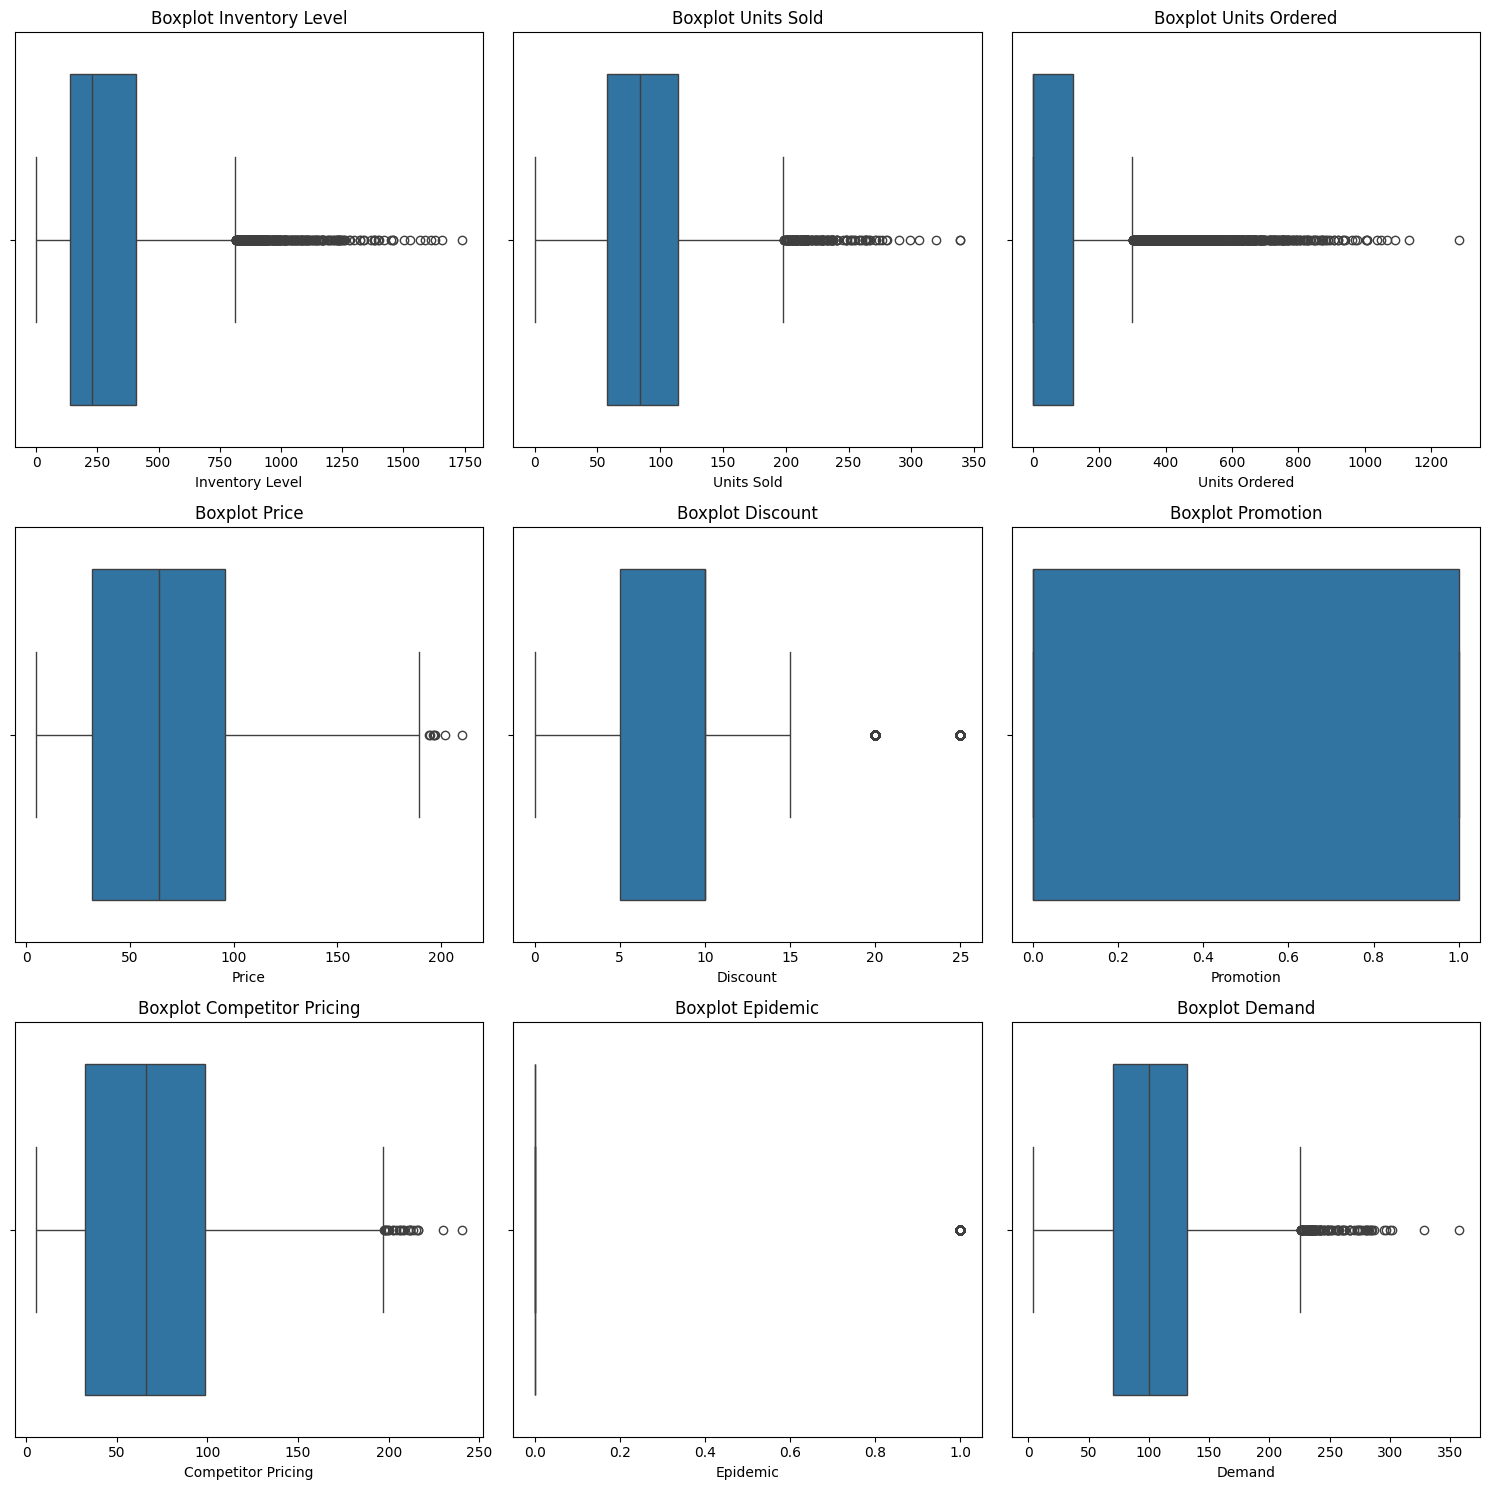

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

df_full = pd.read_csv("sales_data.csv", encoding=encoding)

# Ambil 20% sampel acak dari dataframe
df = df_full.sample(frac=0.12, random_state=42)

print("data teratas fitur terpenting:")
print("Ukuran dataset:", df.shape)
print(df.head(10))

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

# Distribusi fitur numerik (histogram)
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik', fontsize=16)
plt.show()

# Distribusi fitur kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
n = len(categorical_cols)  
n_cols = 3  # Jumlah kolom dalam grid  
n_rows = (n // n_cols) + (n % n_cols > 0)  # Menghitung jumlah baris yang diperlukan  

# Mengatur ukuran figure  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  
axes = axes.flatten()  # Membuat axes menjadi 1D array untuk akses yang lebih mudah  

# Membuat countplot untuk setiap kolom kategorikal  
for i, col in enumerate(categorical_cols):  
    if col in df.columns:  
        if df[col].nunique():  
            sns.countplot(x=col, data=df, ax=axes[i])  
            axes[i].set_title(f'Distribusi Fitur Kategorikal: {col}')  
            axes[i].set_xlabel(col)  
            axes[i].set_ylabel('Jumlah')  
        else:  
            # Jika jumlah kategori lebih dari 10, tidak buat plot  
            axes[i].axis('off')  # Menyembunyikan plot ini  

# Menyembunyikan axes yang tidak digunakan  
for j in range(i + 1, len(axes)):  
    axes[j].axis('off')  

plt.tight_layout()  # Menyusun layout agar tidak saling tumpang tindih  
plt.show()  

# Boxplot untuk deteksi outlier
numerics = df.select_dtypes(include=['int64', 'float64']).columns  
# Menentukan jumlah kolom dan baris untuk grid  
num_cols = 3  # Menentukan jumlah kolom  
num_rows = (len(numerics) + num_cols - 1) // num_cols  # Menghitung jumlah baris yang diperlukan  

# Mempersiapkan figure dan axes  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  

# Mengubah axes menjadi array satu dimensi untuk kemudahan iterasi  
axes = axes.flatten()  

# Membuat boxplot untuk setiap kolom numerik  
for idx, col in enumerate(numerics):  
    sns.boxplot(data=df, x=col, ax=axes[idx])  
    axes[idx].set_title(f'Boxplot {col}')  

# Menyembunyikan axes yang tidak terpakai (jika ada)  
for j in range(idx + 1, num_rows * num_cols):  
    fig.delaxes(axes[j])  

# Mengatur layout untuk memperbaiki tampilan  
plt.tight_layout()  
plt.show()  


Data setelah outlier dihapus:


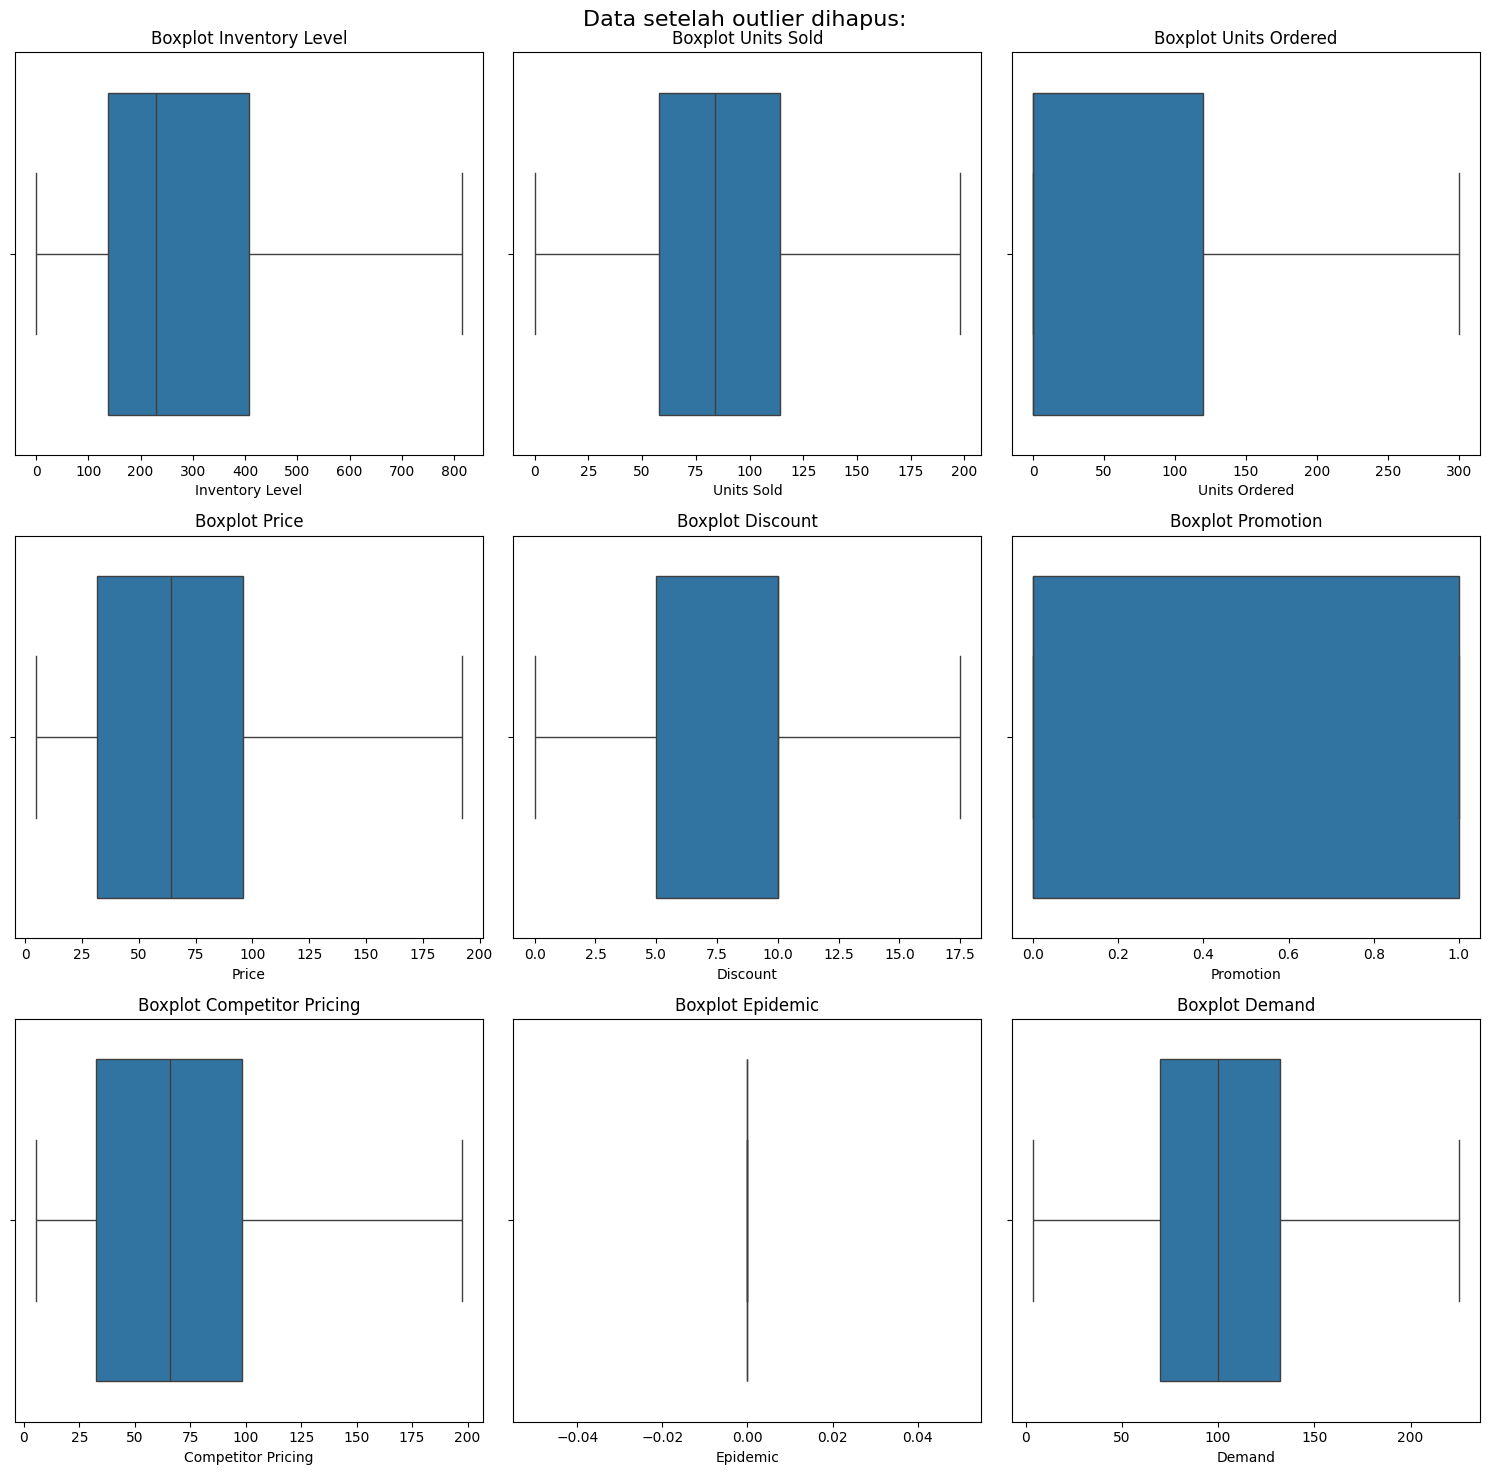


Ukuran dataset setelah menghapus outlier: (9120, 16)


In [ ]:
# Menghapus outlier dari setiap kolom numerik (int atau float) dalam DataFrame
# Menggunakan metode Interquartile Range (IQR).

def remove_outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    # Buat salinan DataFrame untuk menghindari perubahan pada data asli 
    df_clean = df.copy()

    # Ambil hanya kolom numerik
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter baris yang tidak outlier
        df_clean[col] = df_clean[col].apply(
            lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
        )

    return df_clean

df_clean = remove_outliers_iqr(df)

print("\nData setelah outlier dihapus:")
numerics = df_clean.select_dtypes(include=['int64', 'float64']).columns  

# Boxplot untuk deteksi outlier setelah pembersihan
num_cols = 3  # Menentukan jumlah kolom  
num_rows = (len(numerics) + num_cols - 1) // num_cols 

# Mempersiapkan figure dan axes  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  

# Mengubah axes menjadi array satu dimensi untuk kemudahan iterasi  
axes = axes.flatten()  
plt.suptitle('Data setelah outlier dihapus:', fontsize=16)

# Membuat boxplot untuk setiap kolom numerik  
for idx, col in enumerate(numerics):  
    sns.boxplot(data=df_clean, x=col, ax=axes[idx])  
    axes[idx].set_title(f'Boxplot {col}')  

# Menyembunyikan axes yang tidak terpakai (jika ada)  
for j in range(idx + 1, num_rows * num_cols):  
    fig.delaxes(axes[j])  

# Mengatur layout untuk memperbaiki tampilan  
plt.tight_layout()  
plt.show()  
print("\nUkuran dataset setelah menghapus outlier:", df_clean.shape)
df = df_clean

In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 9120 entries, 53731 to 4800
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                9120 non-null   object 
 1   Store ID            9120 non-null   object 
 2   Product ID          9120 non-null   object 
 3   Category            9120 non-null   object 
 4   Region              9120 non-null   object 
 5   Inventory Level     9120 non-null   float64
 6   Units Sold          9120 non-null   float64
 7   Units Ordered       9120 non-null   float64
 8   Price               9120 non-null   float64
 9   Discount            9120 non-null   float64
 10  Weather Condition   9120 non-null   object 
 11  Promotion           9120 non-null   int64  
 12  Competitor Pricing  9120 non-null   float64
 13  Seasonality         9120 non-null   object 
 14  Epidemic            9120 non-null   float64
 15  Demand              9120 non-null   float64
dtypes: floa

In [12]:
print(df.nunique())

Date                   760
Store ID                 5
Product ID              20
Category                 5
Region                   4
Inventory Level        793
Units Sold             198
Units Ordered          252
Price                 6534
Discount                 5
Weather Condition        4
Promotion                2
Competitor Pricing    6617
Seasonality              4
Epidemic                 1
Demand                 222
dtype: int64


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace=True)
print("\nData setelah menambahkan kolom Tahun dan Bulan:")
print(df.head())


Data setelah menambahkan kolom Tahun dan Bulan:
      Store ID Product ID     Category Region  Inventory Level  Units Sold  \
53731     S002      P0012  Electronics  South            339.0        70.0   
61112     S001      P0013         Toys  North             67.0        67.0   
72074     S004      P0015    Furniture   West            263.0        31.0   
56928     S002      P0009    Groceries  South            260.0       165.0   
20979     S004      P0020    Furniture   West            302.0       102.0   

       Units Ordered   Price  Discount Weather Condition  Promotion  \
53731          300.0   72.41       5.0             Sunny          0   
61112           79.0   30.14       5.0             Rainy          0   
72074            0.0   75.55      10.0             Snowy          0   
56928          247.0   73.48       5.0             Rainy          0   
20979            0.0  143.34       0.0            Cloudy          0   

       Competitor Pricing Seasonality  Epidemic  Demand

# Data Pre-Processing


Distribusi target:
Store ID
S005    1897
S002    1822
S004    1817
S003    1804
S001    1780
Name: count, dtype: int64


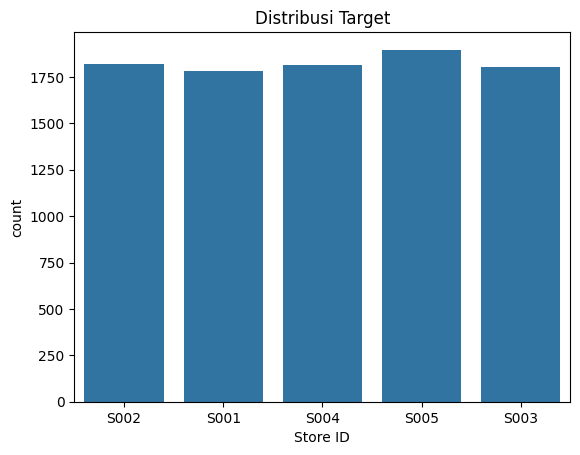

In [ ]:
# Memisahkan fitur dan target label X dan Y

X = df.drop("Store ID", axis=1)  
Y = df["Store ID"]
target_col = 'Store ID'  
if target_col in df.columns:
    print("\nDistribusi target:")
    print(df[target_col].value_counts())
    sns.countplot(x=target_col, data=df)
    plt.title('Distribusi Target')
    plt.show()

Label unik: ['S001' 'S002' 'S003' 'S004' 'S005']
Target setelah di-encode: [1 0 3 1 3 4 4 2 4 3]

Distribusi target:
4    1897
1    1822
3    1817
2    1804
0    1780
Name: count, dtype: int64


C:\Users\Ilham\AppData\Local\Temp\ipykernel_17784\2627002124.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Series(encoded_Y), palette="viridis")


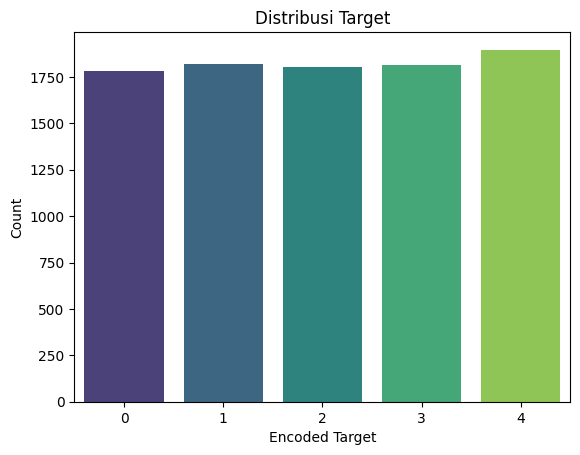

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
encoded_Y = label_encoder.fit_transform(Y)

print("Label unik:", label_encoder.classes_)
print("Target setelah di-encode:", encoded_Y[:10])

# Visualisasi distribusi target setelah encoding
print("\nDistribusi target:")
print(pd.Series(encoded_Y).value_counts())
sns.countplot(x=pd.Series(encoded_Y), palette="viridis")
plt.title('Distribusi Target')
plt.xlabel('Encoded Target')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Identifikasi fitur numerik dan kategorikal
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
print("\nFitur numerik:", numerical_features)
print("Fitur kategorikal:", categorical_features)


Fitur numerik: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Epidemic', 'Demand']
Fitur kategorikal: ['Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']


In [ ]:
# One-hot encoding untuk fitur kategorikal
encoder = OneHotEncoder()
encoded_X = encoder.fit_transform(X[categorical_features])
encoded_X = pd.DataFrame(encoded_X.toarray(), columns=encoder.get_feature_names_out(categorical_features))
print(encoded_X)

      Product ID_P0001  Product ID_P0002  Product ID_P0003  Product ID_P0004  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
9115               0.0               0.0               0.0               0.0   
9116               0.0               0.0               0.0               0.0   
9117               0.0               0.0               0.0               0.0   
9118               0.0               0.0               0.0               0.0   
9119               1.0               0.0               0.0               0.0   

      Product ID_P0005  Product ID_P000

In [ ]:
# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[numerical_features])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features)
print(X_scaled)

      Inventory Level  Units Sold  Units Ordered     Price  Discount  \
0            0.416206    0.353535       1.000000  0.360809  0.285714   
1            0.082259    0.338384       0.263333  0.135130  0.285714   
2            0.322897    0.156566       0.000000  0.377574  0.571429   
3            0.319214    0.833333       0.823333  0.366522  0.285714   
4            0.370780    0.515152       0.000000  0.739504  0.000000   
...               ...         ...            ...       ...       ...   
9115         0.426028    0.414141       0.000000  0.175653  0.571429   
9116         0.379374    0.398990       1.000000  0.964115  0.000000   
9117         0.718232    0.222222       0.000000  0.648901  0.285714   
9118         0.449355    0.126263       0.000000  0.433473  1.000000   
9119         0.180479    0.717172       0.726667  0.408059  0.285714   

      Promotion  Competitor Pricing  Epidemic    Demand  
0           0.0            0.334730       0.0  0.484163  
1           0.0    

In [ ]:
import numpy as np
# Gabungkan fitur numerik yang telah diskalakan dengan fitur kategorikal yang telah di-encode
X = np.hstack((X_scaled, encoded_X))  
print("X shape after encoding and scaling:", X.shape)

X = pd.DataFrame(X)
print(X.isnull().sum())


X shape after encoding and scaling: (9120, 46)
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
dtype: int64


# Data Modeling and Model Evaluation

Accuracy: 0.9753

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       365
           1       1.00      1.00      1.00       366
           2       1.00      1.00      1.00       367
           3       1.00      1.00      1.00       358
           4       0.90      0.98      0.94       368

    accuracy                           0.98      1824
   macro avg       0.98      0.98      0.98      1824
weighted avg       0.98      0.98      0.98      1824

Train Acc: 0.9812225877192983
Test Acc: 0.975328947368421


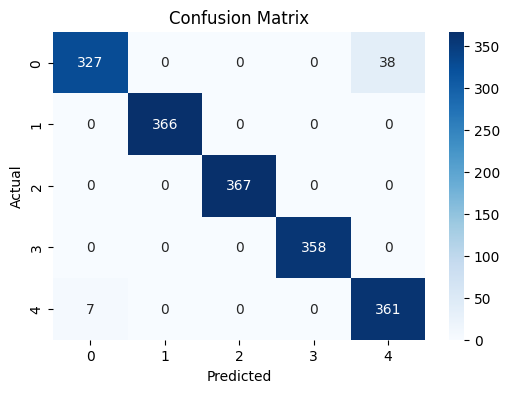

In [ ]:
# Data modeling dengan SVM menggunakan kernel RBF dan teknik modeling Hold-out technique

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.2, random_state=42)

# Buat dan latih model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred = svm_model.predict(X_test)

# Evaluasi

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Train Acc:", svm_model.score(X_train, y_train))
print("Test Acc:", svm_model.score(X_test, y_test))

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Kesimpulan

Pada dataset "Sales data" perlu melakukan beberapa modifikasi seperti membersihkan terlebih dahulu fitur numeriknya kemudian pada label X dilakukan encoding pada fitur categorical dan normalisasi pada fitur numerical nya agar bisa diproses oleh model SVM dan mendapat akurasi terbesar nya. Pada label Y juga perlu di encode agar fitur menjadi numerik yang bisa diproses oleh model SVM, karena model SVM sangat sensitif terhadap tipe data string atau text. 

Salah satu kernel dari SVm yang digunakan pada eksperimen ini adalah 'rbf' mendapat nilai score yang sangat tinggi pada nilai 98 %. Hal ini berarti model dengan kernel 'rbf' dapat menangkap hubungan non-linear anatara fitur dan sangat efektif.